In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator, Aer
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import MCXGate


from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_distribution 

import numpy as np
from math import pi

In [2]:
def grover_d():
    qc = QuantumCircuit(3)
    #Diffusor
    qc.h([0,1,2])
    qc.x([0,1,2])
    qc.h(0)
    qc.ccx(1,2,0)
    qc.h(0)
    qc.barrier()
    qc.x([0,1,2])
    qc.h([0,1,2])

    qc.name="G"
    return qc

In [3]:
def grover_u():
    qc = QuantumCircuit(2)
    #Diffusor
    qc.h([0,1])
    qc.x([0,1])
    qc.h(0)
    qc.cx(1,0)
    qc.h(0)
    qc.barrier()
    qc.x([0,1])
    qc.h([0,1])

    qc.name="G"
    return qc

In [4]:
def oracle1_d():
    qc = QuantumCircuit(4)
    qc.x(2)
    gate = MCXGate(3)
    qc.append(gate, [0, 1, 2, 3])
    qc.x(2)
    qc.name="h1"
    return qc
    

In [5]:
def oracle2_d():
    qc = QuantumCircuit(4)
    qc.x(1)
    gate = MCXGate(3)
    qc.append(gate, [0, 1, 2, 3])
    qc.x(1)
    qc.name="h2"
    return qc

In [6]:
def oracle2_u():
    qc = QuantumCircuit(3)
    qc.x(0)
    gate = MCXGate(2)
    qc.append(gate, [0, 1, 2])
    qc.x(0)
    qc.name="u"
    return qc

In [7]:
def oracle2():
    qc = QuantumCircuit(7)
    qc.x(1)
    qc.x(4)
    gate = MCXGate(5)
    qc.append(gate, [0, 1, 2, 4, 5, 6])
    qc.x(4)
    qc.x(1)
    qc.name="O"
    return qc

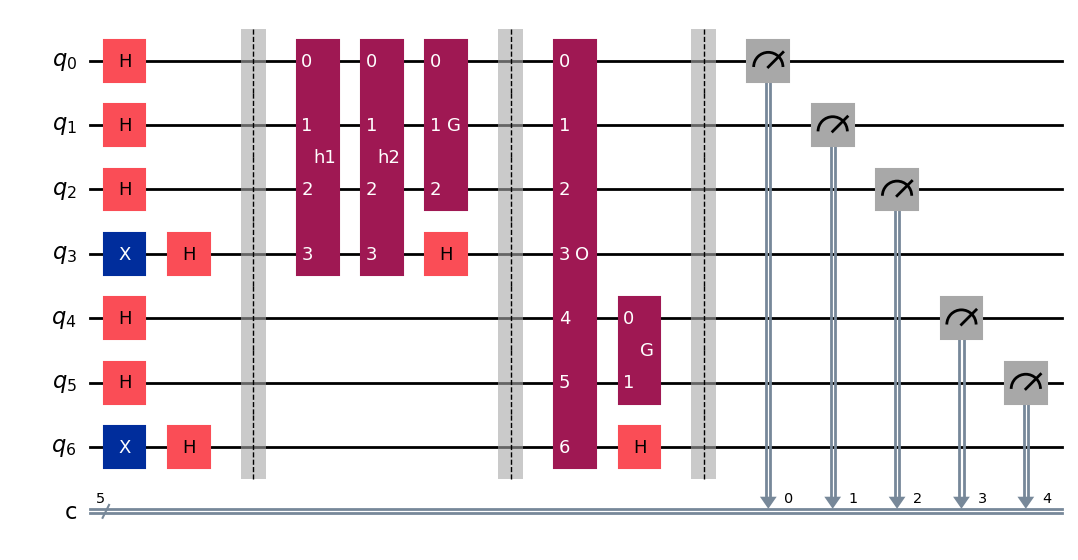

In [8]:
qc = QuantumCircuit(7,5)
#Preparation
qc.h([0,1,2])
qc.h([4,5])
#Preparation of Aux
qc.x(3)
qc.h(3)

qc.x(6)
qc.h(6)
qc.barrier()
qc.append(oracle1_d(),range(4))
qc.append(oracle2_d(),range(4))

qc.h(3)
qc.append(grover_d(),range(3))
qc.barrier()
qc.append(oracle2(),range(7))
qc.h(6)
qc.append(grover_u(),[4,5])
qc.barrier()

qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)

qc.measure(4,3)
qc.measure(5,4)


qc.draw('mpl')


Total count are: {'10011': 1267, '00011': 1280, '11011': 1258, '01011': 1236, '10101': 4959}


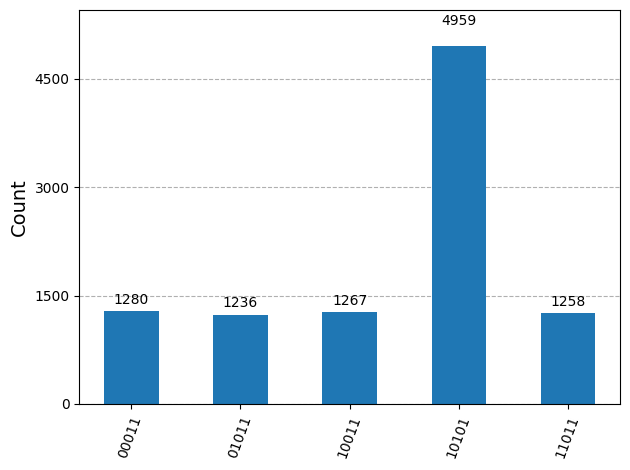

In [9]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc.decompose().decompose().decompose(),shots=10000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

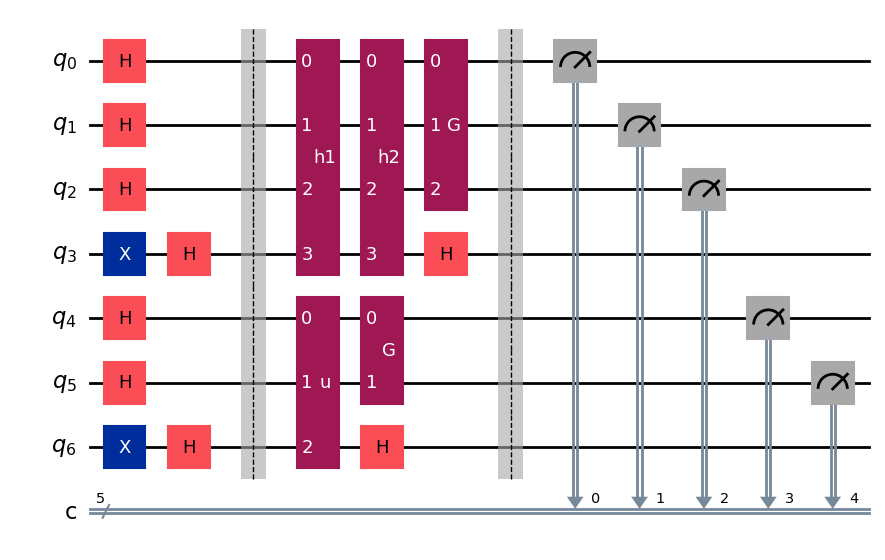

In [10]:
qc = QuantumCircuit(7,5)
#Preparation
qc.h([0,1,2])
qc.h([4,5])
#Preparation of Aux
qc.x(3)
qc.h(3)

qc.x(6)
qc.h(6)
qc.barrier()
qc.append(oracle1_d(),range(4))
qc.append(oracle2_d(),range(4))

qc.append(oracle2_u(),[4,5,6])
qc.h(3)
qc.h(6)

qc.append(grover_d(),range(3))
qc.append(grover_u(),[4,5])

qc.barrier()
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)

qc.measure(4,3)
qc.measure(5,4)


qc.draw('mpl')


Total count are: {'10011': 4937, '10101': 5063}


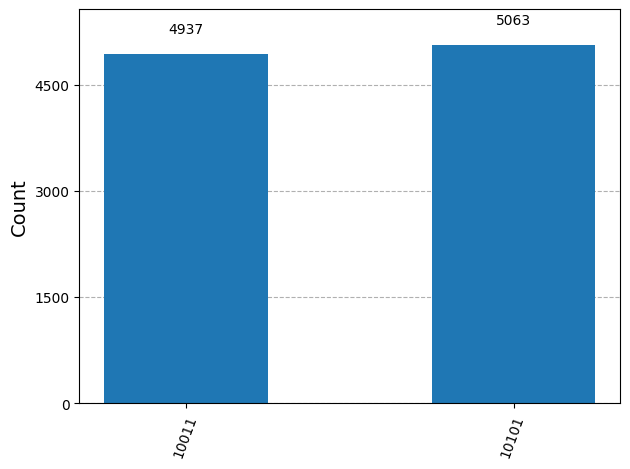

In [11]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc.decompose().decompose().decompose(),shots=10000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

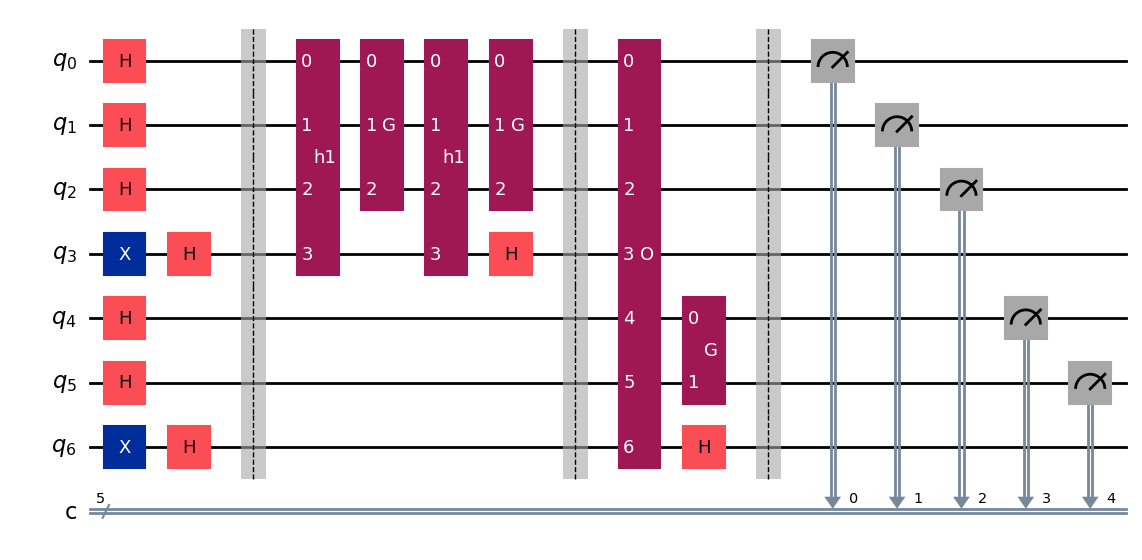

In [12]:
qc = QuantumCircuit(7,5)
#Preparation
qc.h([0,1,2])
qc.h([4,5])
#Preparation of Aux
qc.x(6)
qc.h(6)

qc.x(3)
qc.h(3)
qc.barrier()
qc.append(oracle1_d(),range(4))
#qc.append(oracle2_d(),range(4))
qc.append(grover_d(),range(3))
qc.append(oracle1_d(),range(4))
#qc.append(oracle2_d(),range(4))
qc.h(3)
qc.append(grover_d(),range(3))
qc.barrier()
qc.append(oracle2(),range(7))
qc.h(6)
qc.append(grover_u(),[4,5])
qc.barrier()


qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)

qc.measure(4,3)
qc.measure(5,4)


qc.draw('mpl',fold=120)


Total count are: {'11111': 16, '11000': 17, '11100': 20, '11110': 17, '10000': 16, '11001': 17, '00010': 17, '00111': 20, '10100': 25, '10110': 21, '00110': 23, '10001': 20, '01000': 16, '10010': 18, '10011': 2377, '01110': 23, '01010': 23, '10111': 27, '00100': 18, '01100': 21, '00001': 20, '11010': 26, '01011': 2277, '00011': 2385, '01001': 17, '11011': 2417, '10101': 78, '00000': 13, '01111': 15}


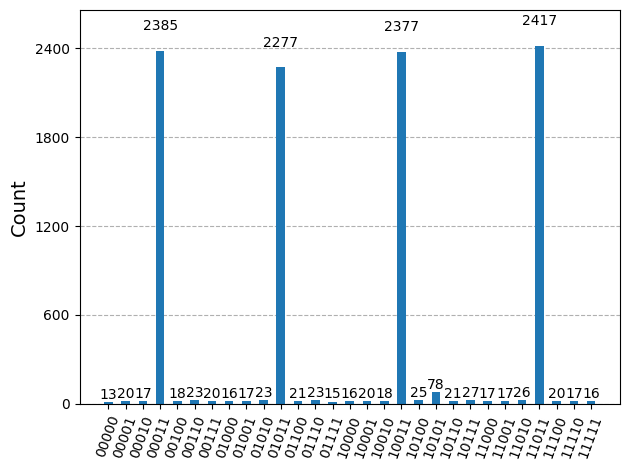

In [13]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc.decompose().decompose().decompose(),shots=10000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

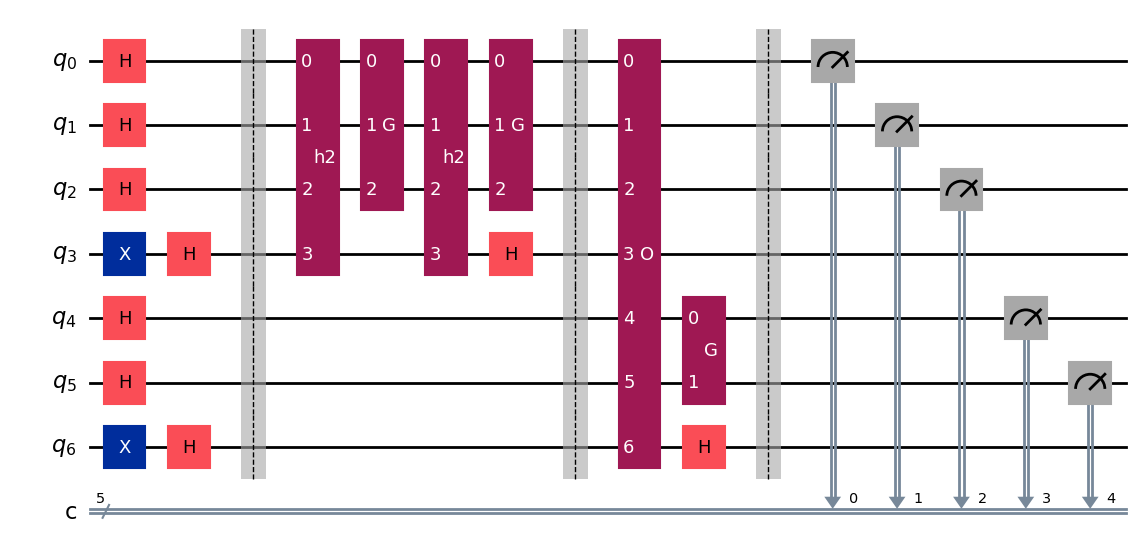

In [14]:
qc = QuantumCircuit(7,5)
#Preparation
qc.h([0,1,2])
qc.h([4,5])
#Preparation of Aux
qc.x(6)
qc.h(6)

qc.x(3)
qc.h(3)
qc.barrier()
#qc.append(oracle1_d(),range(4))
qc.append(oracle2_d(),range(4))
qc.append(grover_d(),range(3))
#qc.append(oracle1_d(),range(4))
qc.append(oracle2_d(),range(4))
qc.h(3)
qc.append(grover_d(),range(3))
qc.barrier()
qc.append(oracle2(),range(7))
qc.h(6)
qc.append(grover_u(),[4,5])
qc.barrier()


qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)

qc.measure(4,3)
qc.measure(5,4)


qc.draw('mpl',fold=120)


Total count are: {'11110': 10, '00010': 20, '01000': 20, '00100': 20, '00011': 19, '00111': 20, '10100': 25, '01110': 25, '10011': 20, '01111': 23, '10001': 22, '01010': 20, '10111': 15, '11100': 21, '01011': 16, '00001': 23, '11010': 19, '01100': 28, '00000': 24, '11011': 22, '01001': 18, '11000': 26, '10000': 17, '11001': 27, '00110': 18, '10110': 24, '11111': 23, '10101': 9416, '10010': 19}


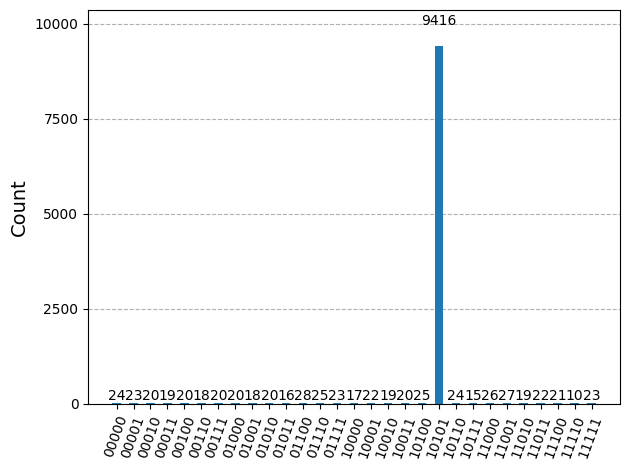

In [15]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc.decompose().decompose().decompose(),shots=10000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)